In [7]:
#import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [8]:
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500 )
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500 )
lat_lngs = zip(lats,lngs)
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [10]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&appid=" + weather_api_key + "&units=imperial"

In [11]:
print(url)

https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&appid=8e01e78b712d0c01a89684f7f9be1e7f&units=imperial


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        #Parse the JSON and retreive data
        city_weather = requests.get(city_url).json()
        
        #Parse out needing data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        
        #append the data into city_data list
        #convert the date to ISO standards
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        city_data.append({
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country" : city_country
        }
        )
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yeppoon
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | sinnamary
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | tyup
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | male
Processing Record 12 of Set 1 | nuuk
Processing Record 13 of Set 1 | bilma
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | athmallik
Processing Record 16 of Set 1 | geresk
City not found. Skipping...
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | marawi
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | barrow
Proc

Processing Record 37 of Set 4 | ucluelet
Processing Record 38 of Set 4 | rio verde de mato grosso
Processing Record 39 of Set 4 | kudahuvadhoo
Processing Record 40 of Set 4 | puerto baquerizo moreno
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | marcona
City not found. Skipping...
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | severo-yeniseyskiy
Processing Record 47 of Set 4 | teonthar
Processing Record 48 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | tuktoyaktuk
Processing Record 1 of Set 5 | broken hill
Processing Record 2 of Set 5 | havre-saint-pierre
Processing Record 3 of Set 5 | san carlos de bariloche
Processing Record 4 of Set 5 | komsomolskiy
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | port elizabeth
Process

Processing Record 20 of Set 8 | kavaratti
Processing Record 21 of Set 8 | utiroa
City not found. Skipping...
Processing Record 22 of Set 8 | chumikan
Processing Record 23 of Set 8 | lat yao
Processing Record 24 of Set 8 | collie
Processing Record 25 of Set 8 | san jeronimo
Processing Record 26 of Set 8 | pitanga
Processing Record 27 of Set 8 | sungaipenuh
Processing Record 28 of Set 8 | uirauna
Processing Record 29 of Set 8 | palmer
Processing Record 30 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 31 of Set 8 | bathsheba
Processing Record 32 of Set 8 | nanortalik
Processing Record 33 of Set 8 | shimoda
Processing Record 34 of Set 8 | grindavik
Processing Record 35 of Set 8 | price
Processing Record 36 of Set 8 | marsa matruh
Processing Record 37 of Set 8 | excelsior springs
Processing Record 38 of Set 8 | vanavara
Processing Record 39 of Set 8 | darnah
Processing Record 40 of Set 8 | vysokovsk
Processing Record 41 of Set 8 | gat
Processing Record 42 of Set 8 | vosto

Processing Record 6 of Set 12 | bjornevatn
Processing Record 7 of Set 12 | port lincoln
Processing Record 8 of Set 12 | garissa
Processing Record 9 of Set 12 | mahebourg
Processing Record 10 of Set 12 | sao felix do xingu
Processing Record 11 of Set 12 | tabou
Processing Record 12 of Set 12 | cristalina
Processing Record 13 of Set 12 | maloy
Processing Record 14 of Set 12 | lagos
Processing Record 15 of Set 12 | saint-joseph
Processing Record 16 of Set 12 | roma
Processing Record 17 of Set 12 | samfya
Processing Record 18 of Set 12 | taywarah
Processing Record 19 of Set 12 | reyes
Processing Record 20 of Set 12 | berlevag
Processing Record 21 of Set 12 | valdivia
Processing Record 22 of Set 12 | vila franca do campo
Processing Record 23 of Set 12 | qabis
City not found. Skipping...
Processing Record 24 of Set 12 | chase
Processing Record 25 of Set 12 | puerto del rosario
Processing Record 26 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 27 of Set 12 | ushtobe
Proces

In [13]:
#Create dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yeppoon,-23.1333,150.7333,64.18,86,36,5.84,AU,2022-06-15 12:22:24
1,Hermanus,-34.4187,19.2345,58.80,54,23,5.50,ZA,2022-06-15 12:26:44
2,Nikolskoye,59.7035,30.7861,59.79,91,81,10.07,RU,2022-06-15 12:26:44
3,Sinnamary,5.3833,-52.9500,80.87,76,42,10.25,GF,2022-06-15 12:26:45
4,Bengkulu,-3.8004,102.2655,78.96,81,88,3.33,ID,2022-06-15 12:25:32
5,Albany,42.6001,-73.9662,69.58,73,17,2.62,US,2022-06-15 12:25:29
6,Tyup,42.7276,78.3648,63.32,68,76,3.29,KG,2022-06-15 12:26:46
7,Male,4.1748,73.5089,85.95,79,75,11.50,MV,2022-06-15 12:26:48
8,Nuuk,64.1835,-51.7216,39.81,56,40,13.80,GL,2022-06-15 12:26:49
9,Bilma,18.6853,12.9164,103.95,18,32,4.34,NE,2022-06-15 12:26:49


In [14]:
new_column_order = ["City","Country","Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

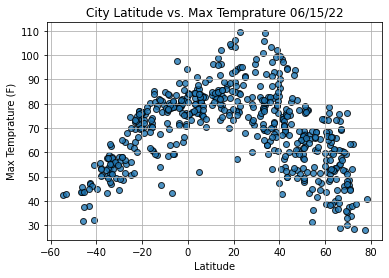

In [17]:
#Import the time module
import time

#Build the scatter plot for lattitude vs max temprature
plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temprature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show the plot
plt.show()

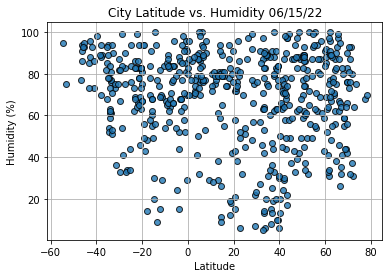

In [18]:
#Import the time module
import time

#Build the scatter plot for lattitude vs max temprature
plt.scatter(lats,humidity,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show the plot
plt.show()

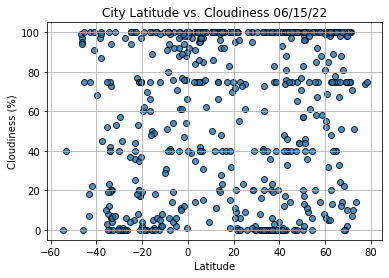

In [19]:
#Import the time module
import time

#Build the scatter plot for lattitude vs max temprature
plt.scatter(lats,cloudiness,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show the plot
plt.show()

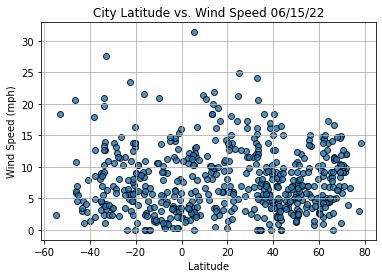

In [20]:
#Import the time module
import time

#Build the scatter plot for lattitude vs max temprature
plt.scatter(lats,wind_speed,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#show the plot
plt.show()

In [21]:

(slope,intercept,a1,a2,a3) = linregress(lats,max_temps)

In [22]:
slope

-0.03756667037671062

In [23]:
intercept

69.68828315934641

In [24]:
reg_value = [(lat * slope + intercept) for lat in lats]

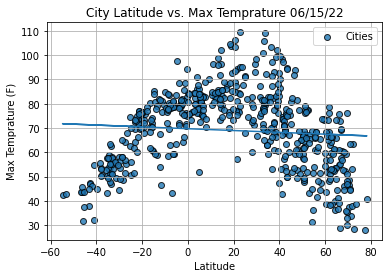

In [25]:
#Import the time module
import time

#Build the scatter plot for lattitude vs max temprature
plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.plot(lats,reg_value)
plt.title("City Latitude vs. Max Temprature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid(True)
plt.legend()

#save the figure
plt.savefig("weather_data/Fig1.png")

#show the plot
plt.show()

In [26]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

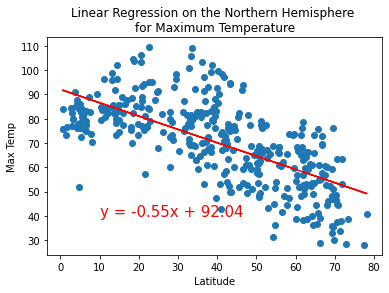

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

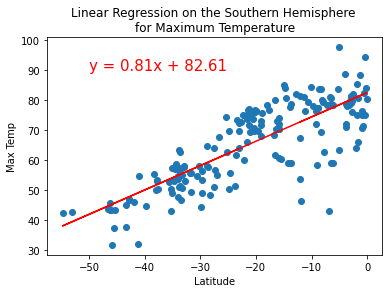

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

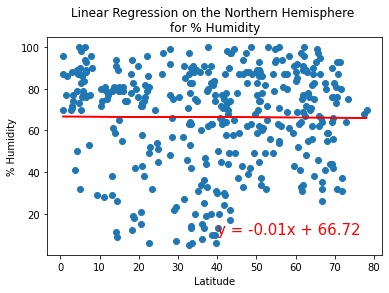

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

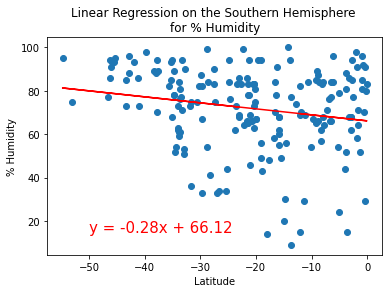

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

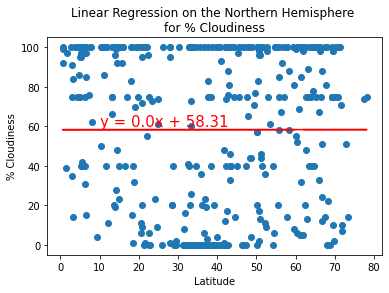

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,60))

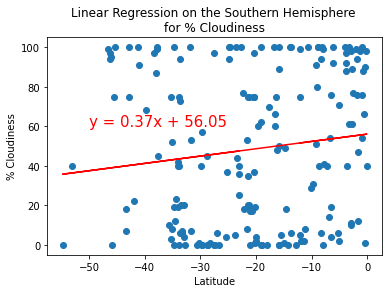

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

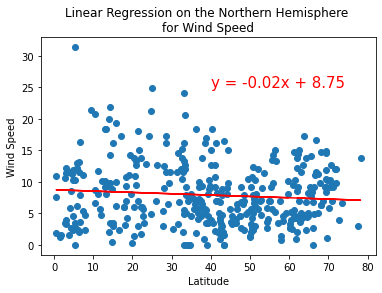

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,25))

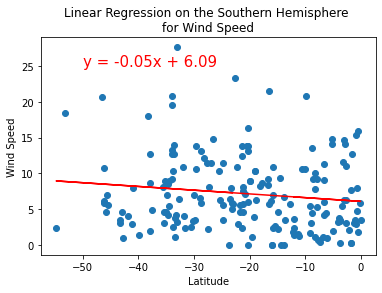

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))